<div class="alert alert-block alert-info">
    <b> Data Viz as Part of the Scientific Process </b><br>
- Research and analytical processes are greatly enhanced by effective data visualization. In fact, arguably every part of a robust statistical process benefits from good data viz. <br>
- The viz that we'll be exploring here largely won't be new archetypes. Instead we'll focus moreso on the context rather than in-depth technical manipulation of the viz, as we've seen most of them already. <br>
- We'll primarily handle this section using the Seaborn package, as this is an area where it really shines. <br>
    
</div>

# 0. Prepare Notebook

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
import warnings

### Import Data Step
- kc_house_data: a sample of house sale prices for King County (inlcudes Seattle), for homes sold between May 2014 and May 2015 (source: https://www.kaggle.com/harlfoxem/housesalesprediction/data)

In [2]:
houses = pd.read_csv('sample_data/kc_house_data.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.51,-122.26,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.72,-122.32,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.74,-122.23,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.52,-122.39,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.62,-122.05,1800.0,7503.0


We're not going to do any complex modeling here (sorry for getting your hopes up!). Instead we'll just do some extremely simple exercises in order to demonstrate the usage of data viz in various aspects of the research process. But, as you can see above, the housing data set provides a fun amount of information for anyone looking to tinker further! And please don't take offense as I skip or gloss over a lot of best practices for the sake of brevity below; this isn't intended to be a data science primer.

# 1. Exploratory Data Analysis

## A) Data Quality
### Let's use heatmaps to chart the presence of zeroes and outliers in some variables from our dataset

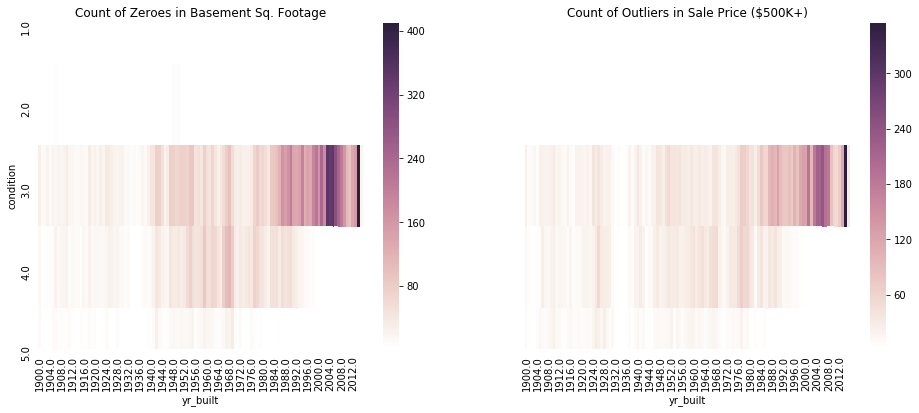

In [3]:
# First let's aggregate and pivot the zeroes check and outliers check into the appropriate format
# We'll group them by house condition grades and the year built
houses_zero = houses[houses['sqft_basement'] == 0].groupby(['yr_built', 'condition'], 
                                                           sort=False).agg({'id': 'count'}).reset_index()
houses_outliers = houses[houses['price'] >= 500000].groupby(['yr_built', 'condition'], 
                                                            sort=False).agg({'id': 'count'}).reset_index()

houses_zero_pv = houses_zero.pivot('condition', 'yr_built', 'id')
houses_outliers_pv = houses_outliers.pivot('condition', 'yr_built', 'id')

# Set the color palette and initialize figure with two axes side by side
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Create two heatmaps, one for zeroes among basement square footage and the other for sale price outliers
sns.heatmap(houses_zero_pv, cmap=cmap, ax=ax1)
sns.heatmap(houses_outliers_pv, cmap=cmap, ax=ax2)

# Set titles
ax1.set_title('Count of Zeroes in Basement Sq. Footage')
ax2.set_title('Count of Outliers in Sale Price ($500K+)')

# Remove the y-axis labels and ticks from the second heatmap since it shares its y-axis with the first
ax2.set_ylabel('')
ax2.set_yticklabels([])

# Turn off ticks
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')

plt.show()

## B) Univariate Trends and Distributions

### Let's use bar charts to look at the distribution of some categorical variables

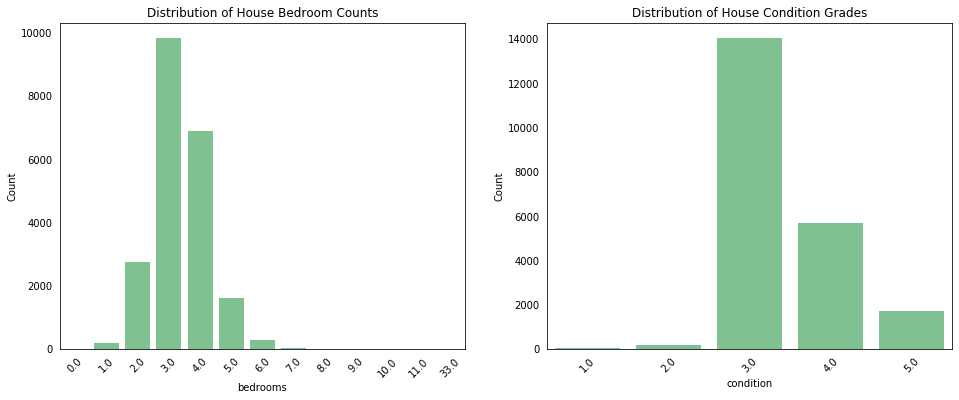

In [4]:
# Start by aggregating a couple of the key variables
bedrooms_agg = houses.groupby(['bedrooms'], sort=False).agg({'id': 'count'}).reset_index()
condition_agg = houses.groupby(['condition'], sort=False).agg({'id': 'count'}).reset_index()

# Sort the data in descending order; this is a good practice unless your categorical vars have a natural ordering
bedrooms_agg = bedrooms_agg.sort_values(['id'], ascending=False).reset_index()
condition_agg = condition_agg.sort_values(['id'], ascending=False).reset_index()

# Initialize figure
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Let's use the seaborn bar plots to plot a couple of simple ordered bar charts
sns.barplot(x='bedrooms', y='id', data=bedrooms_agg, errwidth=0, color='#74cc8c', ax=ax1)
sns.barplot(x='condition', y='id', data=condition_agg, errwidth=0, color='#74cc8c', ax=ax2)

# Format x-axis tick labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Set y-axis labels
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

# Turn off tick marks
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')

# Set titles
ax1.set_title('Distribution of House Bedroom Counts')
ax2.set_title('Distribution of House Condition Grades')

plt.show()

### How about some histograms for numerical variables? Like Sale Price...

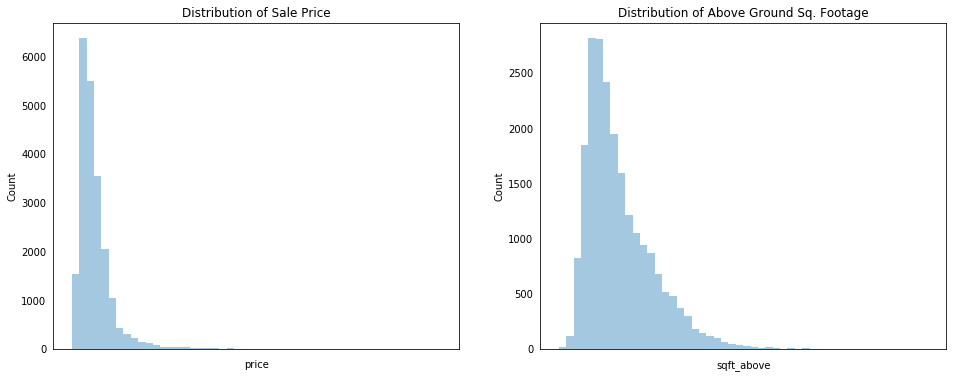

In [5]:
# Initialize figure
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Let's use the seaborn histograms method here
sns.distplot(houses['price'], bins=50, kde=False, rug=False, ax=ax1)
sns.distplot(houses['sqft_above'], bins=50, kde=False, rug=False, ax=ax2)

# Format x-axis tick labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Set y-axis labels
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

# Turn off tick marks
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')

# Set titles
ax1.set_title('Distribution of Sale Price')
ax2.set_title('Distribution of Above Ground Sq. Footage')

plt.show()

## C) Paired Relationships

### Box plots can help look at the categorical differences between numerical variables, such as in sale price by the subjective grade assigned to the property

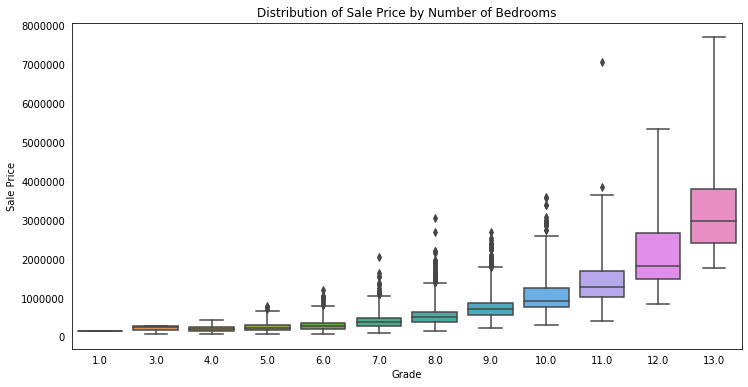

In [6]:
# Initialize figure
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

# Create box plot
# Remember that 'whis' controls the limits of our interquartile range
sns.boxplot(x="grade", y="price", data=houses, whis=3, ax=ax1)

# Format ticks
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')

# Title and axis labels
plt.title('Distribution of Sale Price by Number of Bedrooms')
plt.xlabel('Grade')
plt.ylabel('Sale Price')

plt.show()

### With any regression exercise, we're going to want to create a correlation matrix to check the relationships and collinearity between numerical variables

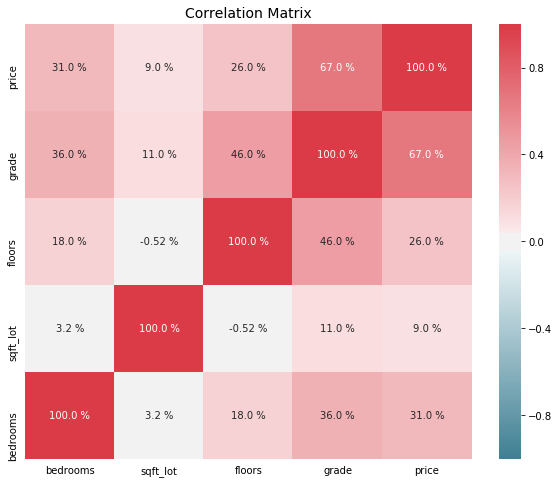

In [7]:
# We'll use pandas' built-in method to get correlation between numerical variables
# For the sake of this exercise, we're interchangeably swapping between categorical and numerical for variables
# like condition and grade, when in fact they're discrete rather than continuous units
corr = houses.loc[:, ['bedrooms', 'sqft_lot', 'floors', 'grade', 'price']].corr()

# Initialize figure
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)

# Now, once again, we turn to our trusty heatmaps to visualize the correlation
# Since correlation can be positive or negative, centered around zero, we'll use a diverging color palette
# We'll also turn on annotations on the correlation matrix and set hard limits for the heatmap
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1, vmax=1, ax=ax1)

# We can also get fancy and format the decimals into percentages on the annotations by iterating over the texts
for t in ax1.texts:
    t.set_text(str(float(t.get_text()) * 100.0) + " %")

# Turns out there's a bug in the newest versions of Matplotlib and Seaborn that causes the first and last row
# of the heatmap to be cut in half, so we'll need to manually set the y-limits based on how many rows we have
ax1.set_ylim(0, 5)

# Format ticks
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

plt.title('Correlation Matrix', fontsize=14)

plt.show()

# 2. Building and Evaluating Models

## A) Feature Importances

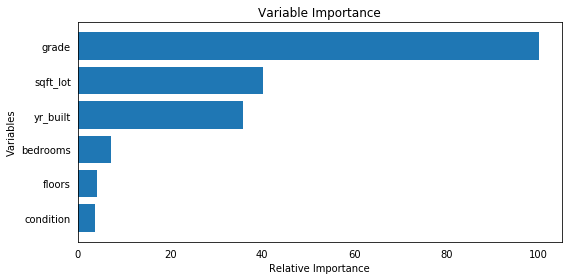

In [39]:
# Let's create a very simple decision tree regressor using SKLearn so that 
# we can extract feature importances through CART analysis
cols = ['bedrooms', 'sqft_lot', 'floors', 'grade', 'condition', 'yr_built']

reg = DecisionTreeRegressor()
reg.fit(houses[cols], houses[['price']])

# get feature importances from fitted model
feature_importance = reg.feature_importances_

# Make all feature importance scores relative to the most important feature
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Get sorted indices of our most important features, from most to least
sorted_idx = np.argsort(feature_importance)

# For plotting, we'll offset our indices by a half point each
pos = np.arange(sorted_idx.shape[0]) + .5

# Headers for labeling our y-axis
heads = [cols[n] for n in sorted_idx]

# Initialize figure
fig = plt.figure(figsize=(8, 4))

# Matplotlib Horizontal Bar Chart
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, heads)

# Format our graph
plt.xlabel('Relative Importance')
plt.ylabel('Variables')
plt.title('Variable Importance')
plt.tight_layout()
plt.tick_params(axis='both', which='both', bottom=False, left=False)

plt.show()

## B) Residuals in Regressions

### Create simple linear regression object for our visualization purposes

In [41]:
# Simple Regression
reg = LinearRegression().fit(houses[cols], houses[['price']])

# Add in-sample predictions and residuals back into our root dataframe
houses['insample'] = reg.predict(houses[cols])
houses['residuals'] = np.abs(houses['price'] - houses['insample'])

### Plot the Actuals vs. In-Sample Predictions

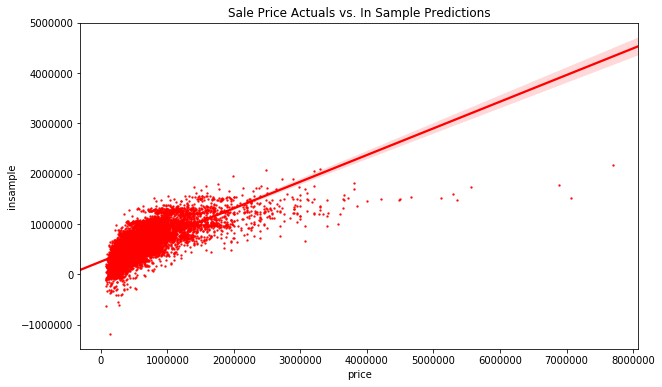

In [45]:
# Initialize figure
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)

# Seaborn's regplot method plots a best fit line with an error bound across our scatter plot,
# Making it specifically useful for this kind of analysis
# The 'marker' parameter denotes the shape of the scatter points, and with scatter_kws, we can control the size

# Documentation for regplot (https://seaborn.pydata.org/generated/seaborn.regplot.html)
sns.regplot(x='price', y='insample', data=houses, marker='o', color='red', scatter_kws={'s': 2})

plt.title("Sale Price Actuals vs. In Sample Predictions")
plt.show()

### Similar exercise, but now let's instead look at the actual values vs. residuals

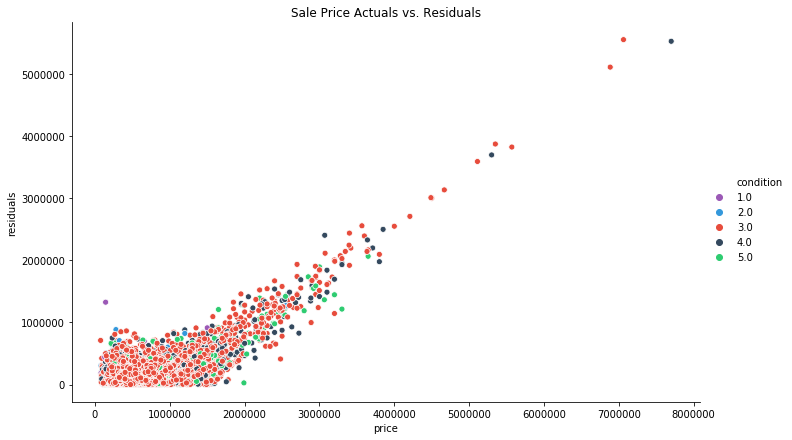

In [58]:
# custom color palette
flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]
pal = sns.color_palette(flatui[:len(houses['condition'].unique())])

# Rather than do the same thing again, we'll show another Seaborn capability for plotting our residuals
# Let's use relplot to do a scatter plot that's automatically grouped by a variable of choice, like house condition
# relplot is a figure level method, like our ridge plot's Facet Grid, so we'll control things like size similarly

# relplot is actually really powerful; here are the docs (https://seaborn.pydata.org/generated/seaborn.relplot.html)
sns.relplot(x='price', y='residuals', data=houses, hue='condition', height=6, aspect=10/6, palette=pal)

plt.title('Sale Price Actuals vs. Residuals')
plt.show()

## C) Confusion Matrices and Prediction Probabilities

### Let's build a small classification model first, for cheap vs expensive houses

In [68]:
# Suppress package warnings for cleanliness
warnings.filterwarnings("ignore", category=FutureWarning)

# Set up variable to split high/low sale prices
houses['sale_high'] = np.where(houses['price'] >= 400000, 1, 0)

# Extremely simple Random Forest classification model
clf = ensemble.RandomForestClassifier(criterion='gini')
clf.fit(houses[cols], houses[['sale_high']])
houses['clf_insample'] = clf.predict(houses[cols])

/Users/Senthil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


### Now we're going to create a confusion matrix to visualize the results of our classification model

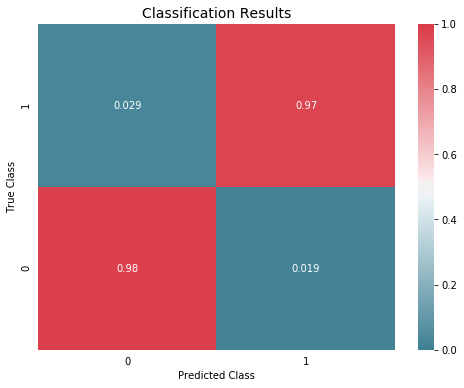

In [113]:
# First get confusion matrix; this raw form will just give us the number of entries in each category as a matrix
# For our matrix, the rows (y-axis) will be actuals, and columns (x-axis) will be predictions
cm = confusion_matrix(houses[['sale_high']], houses[['clf_insample']])

# normalize the confusion matrix
cm = cm.astype(float)/cm.sum(axis=1)[:, np.newaxis]

# Specify our classes
# Because heatmaps go bottom up, specify our classes in reverse order (or better yet, just check to make sure)
classes = ['0', '1']

# Initialize figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)

# Let's make use of our beloved heatmaps again
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=0, vmax=1, ax=ax1)
ax1.set_ylim(0, 2)

# Set tick labels and turn off tick marks
ax1.set_xticklabels(classes)
ax1.set_yticklabels(classes)
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

# Axis labels and titles
ax1.set_ylabel('True Class')
ax1.set_xlabel('Predicted Class')
plt.title('Classification Results', fontsize=14)

plt.show()

### It's also a good idea always to dig into the class probabilities for ourselves and tune/analyze the decision boundaries for ourselves

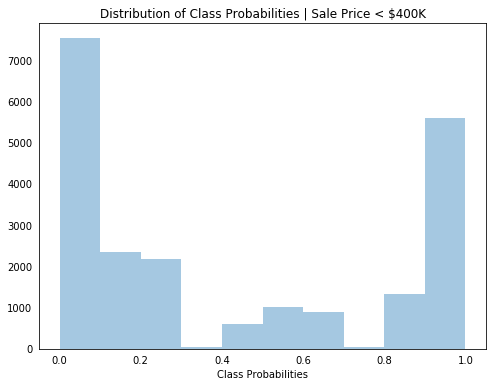

In [120]:
# use the predict_proba method to get the class predictions array
# here our first column will be for 0's and the second column will be for 1's
proba = clf.predict_proba(houses[cols])

# Let's take a look at the distribution of our class probabilities to see how clarified our boundaries are
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)

# We'll use the distplot function again
sns.distplot(proba[:, 0], bins=10, kde=False, rug=False, ax=ax1)

# Format ticks
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

# Axes labels and titles
ax1.set_xlabel('Class Probabilities')
plt.title('Distribution of Class Probabilities | Sale Price < $400K')

plt.show()

## D) Error Bars and Projections

### Let's look at error bars on our projected sale prices by condition

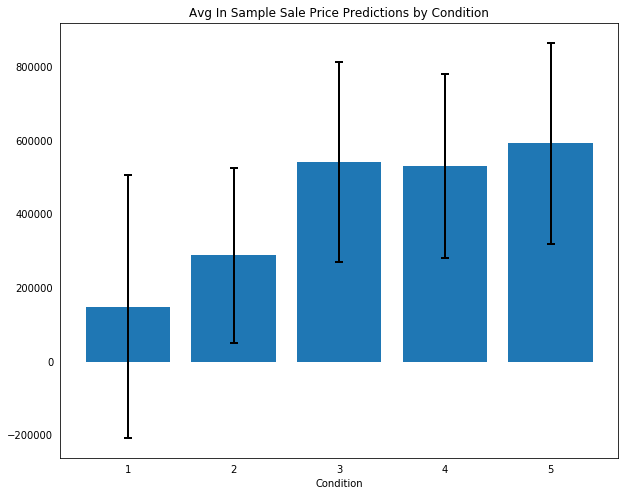

In [144]:
# First get a list of average sale prices and standard deviations (these will be our error bars)
avgs = []
stds = []
for i in sorted(houses['condition'].unique()):
    avgs.append(np.mean(houses[houses['condition'] == i]['insample']))
    stds.append(np.std(houses[houses['condition'] == i]['insample']))

# Initialize figure
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)

# It's actually pretty simple to append custom error bars to the bar plots in Matplotlib
# (you can use similar techniques for error bars on line plots as well, and Seaborn has its own built in methods)
# Use the yerr parameter to set the error bar values and the error_kw parameter to customize the error bars
bar1 = ax1.bar(sorted(houses['condition'].unique()), avgs, yerr=stds, error_kw=dict(lw=2, capsize=4, capthick=2))

# Format ticks
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

# Set axes labels and title
ax1.set_xlabel('Condition')
plt.title('Avg In Sample Sale Price Predictions by Condition')

plt.show()

### We're gonna use synthetic data here, since we're not working with time series data above, but let's demonstrate two different ways to show projections

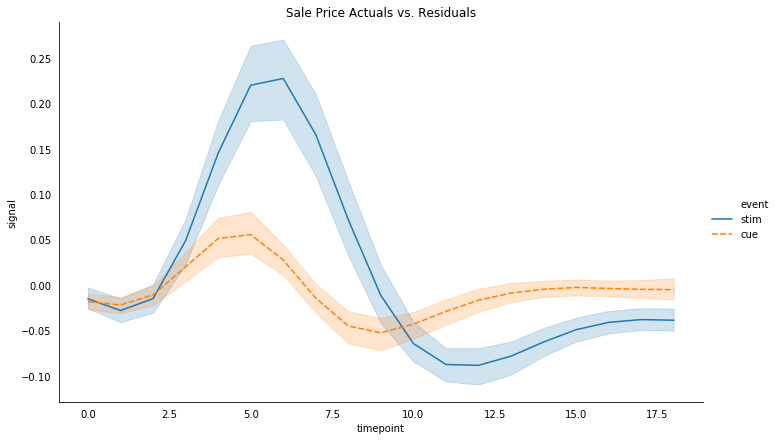

In [155]:
# This first example is directly from the Seaborn documentation for relplot

# load a sample dataset from seaborn
fmri = sns.load_dataset("fmri")

# Use the relplot method again, specifying this time that the groups are based on event type, 
# and that we're doing line graphs this time instead of scatter plots like above
g = sns.relplot(x="timepoint", y="signal", data=fmri, hue="event", style="event", kind="line", height=6, aspect=10/6)

# With a facet grid object (we'll explore this more in Part 4), we can iterate over the individual axis objects
# in the same way that we have with our Matplotlib subplots (why? well, remember Seaborn is built on top of Pyplot)
g.axes[0, 0].xaxis.set_ticks_position('none')
g.axes[0, 0].yaxis.set_ticks_position('none')

plt.title('Sale Price Actuals vs. Residuals')
plt.show()

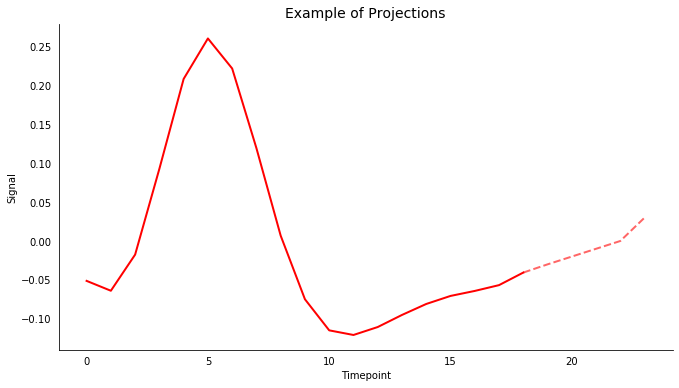

In [190]:
# In this example, we'll extend a line of actuals data with projected data

# Filter out the FMRI dataset
ref_data = fmri[(fmri['event'] == 'stim') & (fmri['region'] == 'parietal') & 
                (fmri['subject'] == 's5')].sort_values(by='timepoint')

# Create a synthetic extension... the FMRI data timepoint goes to 18, which will be our new start point
df_ex = pd.DataFrame({'timepoint': [18, 19, 20, 21, 22, 23], 'signal': [-0.040557, -0.03, -0.02, -0.01, 0, 0.03]})

# Initialize figure
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(1, 1, 1)

# Plot our main line
ax1.plot(ref_data['timepoint'], ref_data['signal'], color='red', linestyle='-', linewidth=2)

# Plot the extended projections line
ax1.plot(df_ex['timepoint'], df_ex['signal'], color='red', linestyle='--', linewidth=2, alpha=0.6)

# Format ticks and spines
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Axis labels and titles
ax1.set_xlabel('Timepoint')
ax1.set_ylabel('Signal')
plt.title('Example of Projections', fontsize=14)

plt.show()